<a href="https://colab.research.google.com/github/ariso-sac/Sep-2022-NoteBooks/blob/colab-week-2/KernelRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(0,8,200)
y=[]
for i in x:
  temp=(i-4)**3+np.random.random()*10*3+60
  y.append(temp)
y=np.array(y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


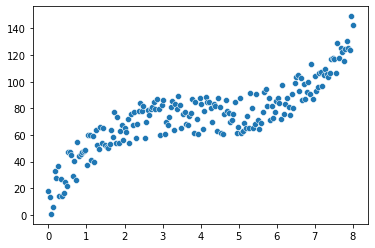

In [3]:
sns.scatterplot(x,y)

In [4]:
temp=[]
for i in x:
  temp.append([i])
temp=np.array(temp)
temp.shape

(200, 1)

In [5]:
from sklearn.preprocessing import add_dummy_feature

In [6]:
X=temp.copy()
X=add_dummy_feature(X)
X=X.T

In [7]:
X.shape

(2, 200)

In [8]:
base = X @ X.T
# base = X.T @ X
base.shape

(2, 2)

In [9]:
w=np.linalg.pinv(base) @ X @ y
# w=np.linalg.pinv(base) @ X.T @ y
w

array([37.40919597,  9.26832122])

In [10]:
y_line=[w[0]+i*w[1] for i in x]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


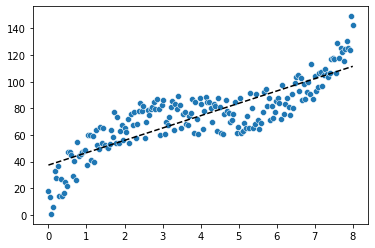

In [11]:
sns.scatterplot(x,y)
plt.plot(x,y_line,'--',color='black')

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(temp,y)

LinearRegression()

In [13]:
reg.coef_

array([9.26832122])

In [14]:
reg.intercept_

37.40919596972971

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


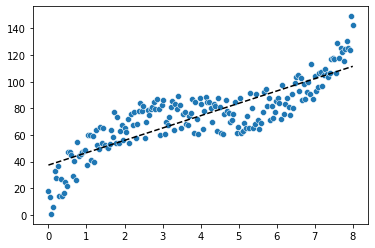

In [15]:
y_line=[reg.intercept_+i*reg.coef_[0] for i in x]
sns.scatterplot(x,y)
plt.plot(x,y_line,'--',color='black')

In [16]:
def K(X,p):
  return (X @ X.T+1)**p

In [17]:
def kernel(a,b,p):
  return (1 + a @ b.T)**p

In [18]:
# alpha=np.linalg.pinv(kernelK(temp,3))*y
# alpha

In [19]:
# alpha.shape

In [20]:
def pred(train,test,p):
  alpha=np.linalg.pinv(K(temp,p)) @ y
  out=kernel(train,test,p).T @ alpha
  return out

In [21]:
out=pred(temp,temp,1)
out.shape

(200,)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x7fc95b2d40a0>,
 <a list of 30 Text major ticklabel objects>)

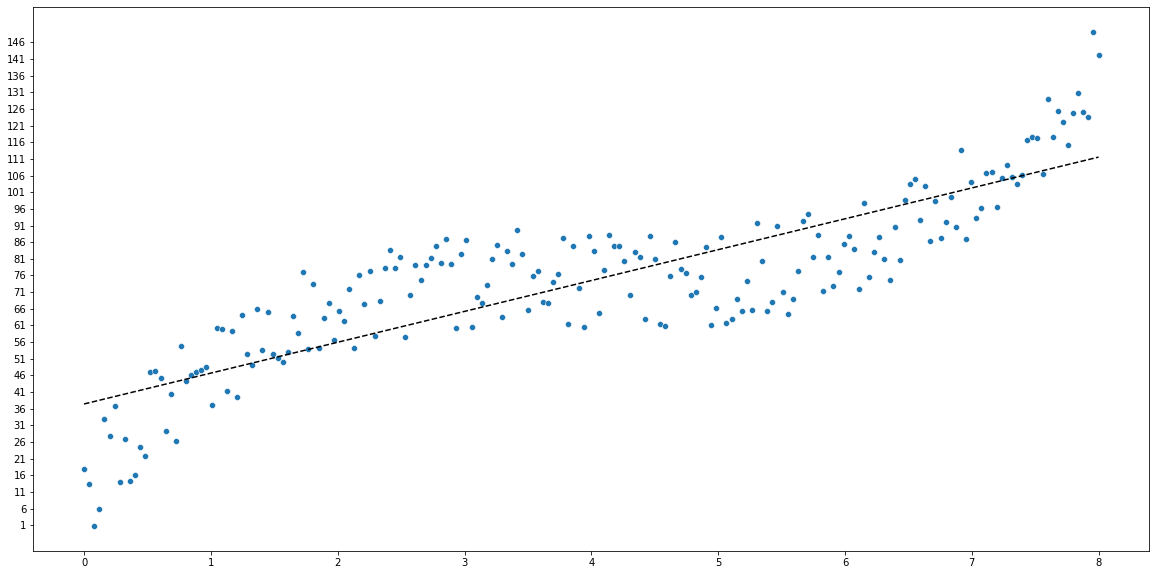

In [22]:
# y_line=[reg.intercept_+i*reg.coef_[0] for i in x]
out=out.reshape(200,1)
plt.figure(figsize=(20,10))
sns.scatterplot(x,y)
plt.plot(x,out,'--',color='black')
plt.yticks([i for i in range(1,150,5)])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x7fc9589e7f70>,
 <a list of 30 Text major ticklabel objects>)

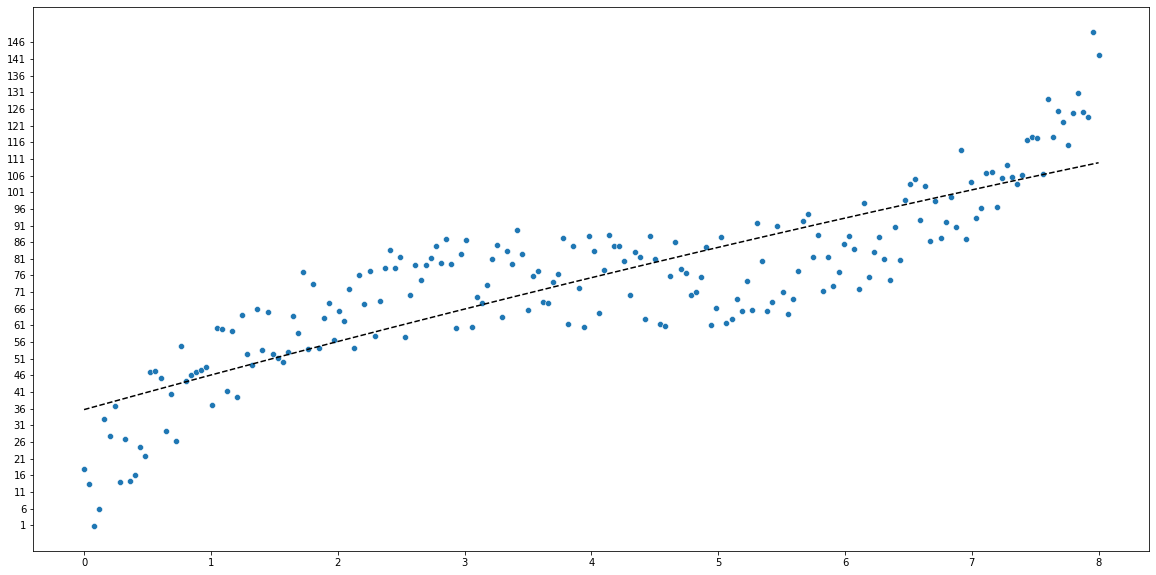

In [23]:
out=pred(temp,temp,2)
out=out.reshape(200,1)
plt.figure(figsize=(20,10))
sns.scatterplot(x,y)
plt.plot(x,out,'--',color='black')
plt.yticks([i for i in range(1,150,5)])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x7fc958970dc0>,
 <a list of 30 Text major ticklabel objects>)

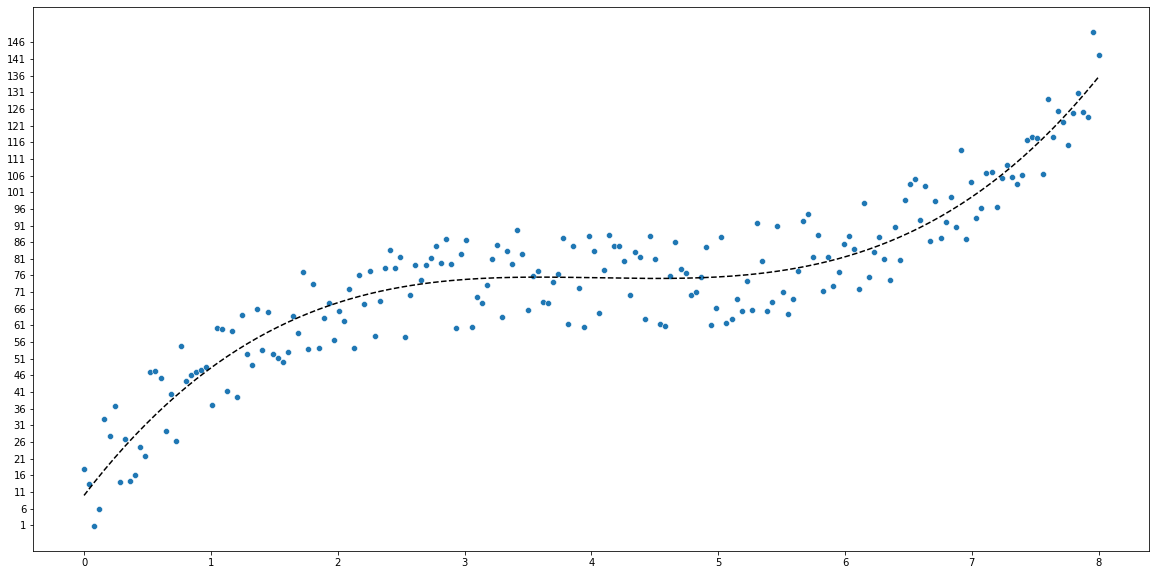

In [24]:
out=pred(temp,temp,3)
out=out.reshape(200,1)
plt.figure(figsize=(20,10))
sns.scatterplot(x,y)
plt.plot(x,out,'--',color='black')
plt.yticks([i for i in range(1,150,5)])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x7fc95873b610>,
 <a list of 30 Text major ticklabel objects>)

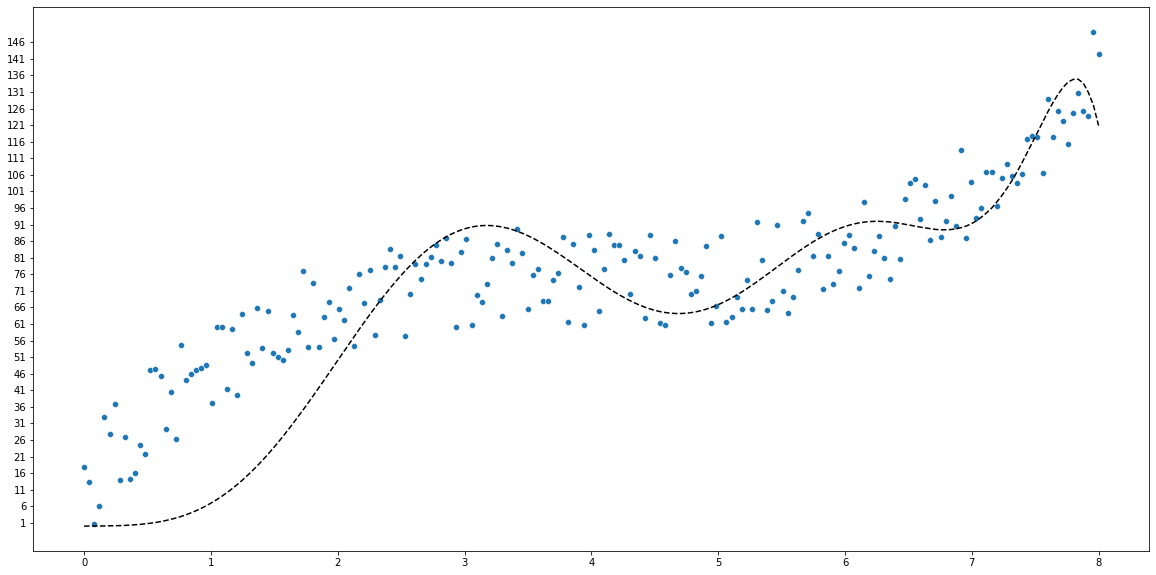

In [28]:
out=pred(temp,temp,10)
out=out.reshape(200,1)
plt.figure(figsize=(20,10))
sns.scatterplot(x,y)
plt.plot(x,out,'--',color='black')
plt.yticks([i for i in range(1,150,5)])